In [55]:
# install and import necessary libraries.

!pip install contractions

import re, string, unicodedata                          # Import Regex, string and unicodedata.
import contractions                                     # Import contractions library.
from bs4 import BeautifulSoup                           # Import BeautifulSoup.

import numpy as np                                      # Import numpy.
import pandas as pd                                     # Import pandas.
import nltk                                             # Import Natural Language Tool-Kit.

nltk.download('stopwords')                              # Download Stopwords.
nltk.download('punkt')
nltk.download('wordnet')

from nltk.corpus import stopwords                       # Import stopwords.
from nltk.tokenize import word_tokenize, sent_tokenize  # Import Tokenizer.
from nltk.stem.wordnet import WordNetLemmatizer         # Import Lemmatizer.

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\azmohamm\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\azmohamm\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\azmohamm\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [56]:
# Load data set
sentiment=pd.read_csv("Tweets.csv")

In [57]:
sentiment.shape

(14640, 15)

In [58]:
sentiment.describe()

,tweet_id,airline_sentiment_confidence,negativereason_confidence,retweet_count
count,1.464000e+04,14640.000000,10522.000000,14640.000000
mean,5.692184e+17,0.900169,0.638298,0.082650
std,7.791112e+14,0.162830,0.330440,0.745778
min,5.675883e+17,0.335000,0.000000,0.000000
25%,5.685592e+17,0.692300,0.360600,0.000000
50%,5.694779e+17,1.000000,0.670600,0.000000
75%,5.698905e+17,1.000000,1.000000,0.000000
max,5.703106e+17,1.000000,1.000000,44.000000


In [59]:
sentiment.dtypes

tweet_id                          int64
airline_sentiment                object
airline_sentiment_confidence    float64
negativereason                   object
negativereason_confidence       float64
airline                          object
airline_sentiment_gold           object
name                             object
negativereason_gold              object
retweet_count                     int64
text                             object
tweet_coord                      object
tweet_created                    object
tweet_location                   object
user_timezone                    object
dtype: object

In [60]:
cols2drop=list(set(sentiment.columns)-set(['text', 'airline_sentiment']))
sentiment.drop(columns=cols2drop, inplace=True)
pd.set_option('display.max_colwidth', None)
sentiment.head()

,airline_sentiment,text
0,neutral,@VirginAmerica What @dhepburn said.
1,positive,@VirginAmerica plus you've added commercials to the experience... tacky.
2,neutral,@VirginAmerica I didn't today... Must mean I need to take another trip!
3,negative,"@VirginAmerica it's really aggressive to blast obnoxious ""entertainment"" in your guests' faces &amp; they have little recourse"
4,negative,@VirginAmerica and it's a really big bad thing about it


In [61]:
sentiment.shape

(14640, 2)

In [62]:
# Any null values?
sentiment.isnull().sum(axis=0)   

airline_sentiment    0
text                 0
dtype: int64

In [63]:
sentiment['airline_sentiment']=sentiment['airline_sentiment'].astype('category')

In [64]:
sentiment['airline_sentiment'].value_counts()

negative    9178
neutral     3099
positive    2363
Name: airline_sentiment, dtype: int64

In [65]:
#html tag removal
def strip_html(text):
    soup = BeautifulSoup(text, "html.parser")
    return soup.get_text()

sentiment['text'] = sentiment['text'].apply(lambda x: strip_html(x))
sentiment.head()

,airline_sentiment,text
0,neutral,@VirginAmerica What @dhepburn said.
1,positive,@VirginAmerica plus you've added commercials to the experience... tacky.
2,neutral,@VirginAmerica I didn't today... Must mean I need to take another trip!
3,negative,"@VirginAmerica it's really aggressive to blast obnoxious ""entertainment"" in your guests' faces & they have little recourse"
4,negative,@VirginAmerica and it's a really big bad thing about it


In [66]:
# Good practice to replace contractions, even though it is not asked in the project
def replace_contractions(text):
    """Replace contractions in string of text"""
    return contractions.fix(text)

sentiment['text'] = sentiment['text'].apply(lambda x: replace_contractions(x))
sentiment.head()

,airline_sentiment,text
0,neutral,@VirginAmerica What @dhepburn said.
1,positive,@VirginAmerica plus you have added commercials to the experience... tacky.
2,neutral,@VirginAmerica I did not today... Must mean I need to take another trip!
3,negative,"@VirginAmerica it is really aggressive to blast obnoxious ""entertainment"" in your guests' faces & they have little recourse"
4,negative,@VirginAmerica and it is a really big bad thing about it


In [67]:
# Tokenization
sentiment['text'] = sentiment.apply(lambda row: nltk.word_tokenize(row['text']), axis=1)

In [68]:
# Remove numbers
def remove_numbers(words):
    new_words = []
    for word in words:
        new_word = re.sub(r'\d+', '', word)
        if new_word != '':
            new_words.append(new_word)
    return new_words

sentiment['text'] = sentiment['text'].apply(lambda x: remove_numbers(x))
sentiment.head()

,airline_sentiment,text
0,neutral,"[@, VirginAmerica, What, @, dhepburn, said, .]"
1,positive,"[@, VirginAmerica, plus, you, have, added, commercials, to, the, experience, ..., tacky, .]"
2,neutral,"[@, VirginAmerica, I, did, not, today, ..., Must, mean, I, need, to, take, another, trip, !]"
3,negative,"[@, VirginAmerica, it, is, really, aggressive, to, blast, obnoxious, ``, entertainment, '', in, your, guests, ', faces, &, they, have, little, recourse]"
4,negative,"[@, VirginAmerica, and, it, is, a, really, big, bad, thing, about, it]"


In [69]:
# Remove special characters and punctuations
def remove_special_punctuations(words):
    new_words = []
    for word in words:
        new_word = unicodedata.normalize('NFKD', word).encode('ascii', 'ignore').decode('utf-8', 'ignore')
        new_word = re.sub(r'[^\w\s]', '', new_word)
        if new_word != '':
            new_words.append(new_word)
    return new_words

sentiment['text'] = sentiment['text'].apply(lambda x: remove_special_punctuations(x))
sentiment.head()

,airline_sentiment,text
0,neutral,"[VirginAmerica, What, dhepburn, said]"
1,positive,"[VirginAmerica, plus, you, have, added, commercials, to, the, experience, tacky]"
2,neutral,"[VirginAmerica, I, did, not, today, Must, mean, I, need, to, take, another, trip]"
3,negative,"[VirginAmerica, it, is, really, aggressive, to, blast, obnoxious, entertainment, in, your, guests, faces, they, have, little, recourse]"
4,negative,"[VirginAmerica, and, it, is, a, really, big, bad, thing, about, it]"


In [70]:
# Convert to lowercase
def to_lowercase(words):
    """Convert all characters to lowercase from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = word.lower()
        new_words.append(new_word)
    return new_words

sentiment['text'] = sentiment['text'].apply(lambda x: to_lowercase(x))
sentiment.head()

,airline_sentiment,text
0,neutral,"[virginamerica, what, dhepburn, said]"
1,positive,"[virginamerica, plus, you, have, added, commercials, to, the, experience, tacky]"
2,neutral,"[virginamerica, i, did, not, today, must, mean, i, need, to, take, another, trip]"
3,negative,"[virginamerica, it, is, really, aggressive, to, blast, obnoxious, entertainment, in, your, guests, faces, they, have, little, recourse]"
4,negative,"[virginamerica, and, it, is, a, really, big, bad, thing, about, it]"


In [71]:
stopwords = stopwords.words('english')

customlist = ['not', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn', "hadn't", 'hasn',
        "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn',
        "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn',
        "wasn't", 'weren', "weren't", 'won', "won't", 'wouldn', "wouldn't"]

# Set custom stop-word's list as not, couldn't etc. words matter in Sentiment, so not removing them from original data.

stopwords = list(set(stopwords) - set(customlist))                              
# Remove stopwords, even though it is not a part of the project
def remove_stopwords(words):
    """Remove stop words from list of tokenized words"""
    new_words = []
    for word in words:
        if word not in stopwords:
            new_words.append(word)
    return new_words

sentiment['text'] = sentiment['text'].apply(lambda x: remove_stopwords(x))
sentiment.head()

,airline_sentiment,text
0,neutral,"[virginamerica, dhepburn, said]"
1,positive,"[virginamerica, plus, added, commercials, experience, tacky]"
2,neutral,"[virginamerica, not, today, must, mean, need, take, another, trip]"
3,negative,"[virginamerica, really, aggressive, blast, obnoxious, entertainment, guests, faces, little, recourse]"
4,negative,"[virginamerica, really, big, bad, thing]"


In [72]:
# Lemmatize
lemmatizer = WordNetLemmatizer()
def lemmatize_list(words):
    new_words = []
    for word in words:
        new_words.append(lemmatizer.lemmatize(word, pos='v'))
    return new_words

sentiment['text'] = sentiment['text'].apply(lambda x: lemmatize_list(x))
sentiment.head()

,airline_sentiment,text
0,neutral,"[virginamerica, dhepburn, say]"
1,positive,"[virginamerica, plus, add, commercials, experience, tacky]"
2,neutral,"[virginamerica, not, today, must, mean, need, take, another, trip]"
3,negative,"[virginamerica, really, aggressive, blast, obnoxious, entertainment, guests, face, little, recourse]"
4,negative,"[virginamerica, really, big, bad, thing]"


In [73]:
# Join the words back
def join_words(words):
    return ' '.join(words)

sentiment['text'] = sentiment['text'].apply(lambda x: join_words(x))
sentiment.head()

,airline_sentiment,text
0,neutral,virginamerica dhepburn say
1,positive,virginamerica plus add commercials experience tacky
2,neutral,virginamerica not today must mean need take another trip
3,negative,virginamerica really aggressive blast obnoxious entertainment guests face little recourse
4,negative,virginamerica really big bad thing


In [86]:
# Count vectorizeer
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(max_features=1000)
cv_features = cv.fit_transform(sentiment['text'])

cv_features = cv_features.toarray()                        # Convert the data features to array.
cv_features.shape

(14640, 1000)

In [87]:
# Tdif vectorizer
from sklearn.feature_extraction.text import TfidfVectorizer 
 
# settings that you use for count vectorizer will go here 
tfidf=TfidfVectorizer(max_features=1000) 
 
# just send in all your docs here 
tfidf_features=tfidf.fit_transform(sentiment['text'])
tfidf_features = tfidf_features.toarray()
tfidf_features.shape

(14640, 1000)

In [88]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

In [89]:
cv_rf = RandomForestClassifier(n_jobs=4, min_samples_leaf=10)
X_train_cv, X_test_cv, y_train_cv, y_test_cv = train_test_split(cv_features, sentiment['airline_sentiment'], test_size=0.3, random_state=42)
cv_rf.fit(X_train_cv, y_train_cv)

print("Training score for CV=%0.4f" %(cv_rf.score(X_train_cv, y_train_cv)))
print("Testing score for CV=%0.4f" %(cv_rf.score(X_test_cv, y_test_cv)))

Training score for CV=0.7336
Testing score for CV=0.7425


In [90]:
tfidf_rf = RandomForestClassifier(n_jobs=4, min_samples_leaf=10)
X_train_tfidf, X_test_tfidf, y_train_tfidf, y_test_tfidf = train_test_split(tfidf_features, sentiment['airline_sentiment'], test_size=0.3, random_state=42)
tfidf_rf.fit(X_train_tfidf, y_train_tfidf)

print("Training score for tfidf=%0.4f" %(tfidf_rf.score(X_train_tfidf, y_train_tfidf)))
print("Testing score for tfidf=%0.4f" %(tfidf_rf.score(X_test_tfidf, y_test_tfidf)))

Training score for tfidf=0.7556
Testing score for tfidf=0.7582


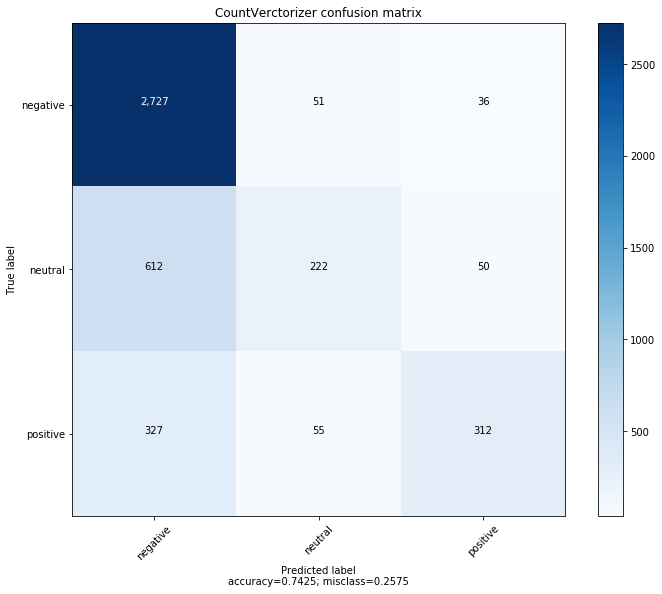

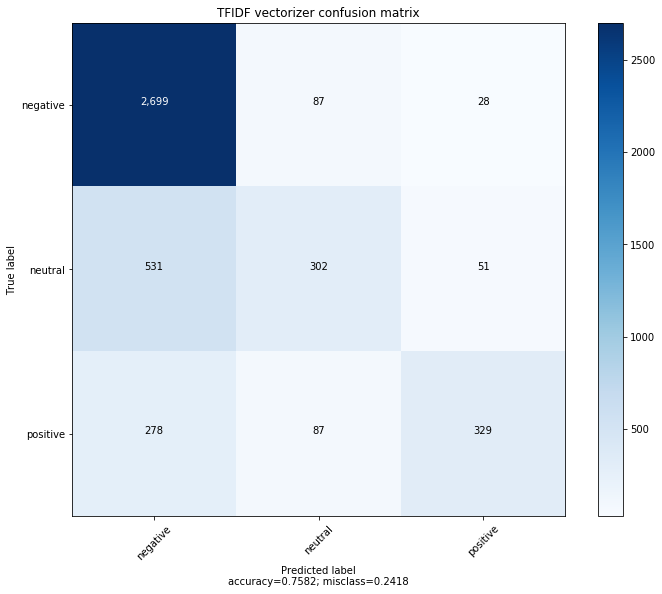

In [91]:
# Plot confusion matrices
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
y_pred_cv=cv_rf.predict(X_test_cv)
y_pred_tfidf=tfidf_rf.predict(X_test_tfidf)
def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):
   

    import itertools

    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(10, 8))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    thresh = cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()
  
plot_confusion_matrix(confusion_matrix(y_test_cv, y_pred_cv), target_names=['negative', 'neutral', 'positive'], title="CountVerctorizer confusion matrix")

plot_confusion_matrix(confusion_matrix(y_test_tfidf, y_pred_tfidf), target_names=['negative', 'neutral', 'positive'], title="TFIDF vectorizer confusion matrix")


In [92]:
y_test_cv.value_counts()

negative    2814
neutral      884
positive     694
Name: airline_sentiment, dtype: int64

Various preprocessing techniques:

* HTML tag removal:
HTML tags don't add any information for sentiment analysis, hence can be done away with.

* Tokenization;
Tokenization is necessary to work with CountVectorization or TDIF vectorization.

* Replace contractions:
Some text samples may use "didn't" and some other may use the equivalent "did not". By replacing contractions (didn't becomes did not) we explicitly bring out the equivalency.

* Removal of numbers:
Numbers sometimes have no relevance and in some cases play an important role. "I would like to give 4 stars" can say a lot about the sentiment, but in some cases "I had the same experience 2 times" doesn't convey if it is about a positive experience or negative. In this case, since we are not rating numerically, it is better to remove the numbers to avoid any interpretation of the sentiment.

* Remove punctuations:
Punctuations play very little role in the sentiment of a message, so it is safe to remove them to avoid false interpretation and reduce dimensionality.

* Lowercase:
Lowering the case significantly reduces dimensionality as mixed case usage can blow up the number of features. It also brings "Good" and "good" to the same level.

* Stop words removal:
Since the problem here is sentiment analysis, it is generally good to remove stop words since they significantly scale down the features with very little loss of information.

* Lemmatization:
For sentiment analysis that conveys positive/negative/neutral feeling, generally the base form is sufficient. Lemmatization preserves this feeling while greatly reducing dimensionality.



Vectorization:

* Count vectorization:
This is a very simple matrix that shows how often each word appears in a document. Even though it is not too useful in complicated tasks, for sentiment analysis it is good enough.

* TFIDF vectorization:
TFIDF normalizes the count. It basically adjusts for the fact that some words will naturally show up more often.


Performance of the model:

* TFIDF performs slightly better than plain Count vectorization. This is inline with expectations.
* Score of about 75% in both cases is not bad. Since test score is so similar to training score, the models are good fit.
* The confusion matrices indicate that in case of misclassification, it usually doesn't go too extreme. That is if a negative sentiment is misclassified, it is usually misclassified as neutral and not as positive.